# Analisa Faktor Penjualan Mobil pada Crankshaft List

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#1)
	* [Tujuan](#11)
* [Pra-pemrosesan Data](#2)
	* [Memuat Data](#21)
	* [Mengeksplorasi Data](#22)
	* [Mengatasi Nilai-nilai yang Hilang](#23)
		* [Kolom model_year](#231)
		* [Kolom cylinders](#232)
		* [Kolom odometer](#233)
		* [Kolom paint_color](#234)
		* [Kolom is_4wd](#235)
	* [Memperbaiki Tipe Data](#24)
	* [Memperbaiki kualitas data](#25)
	* [Memeriksa data yang sudah bersih](#26)
* [Mempelajari parameter inti](#3)
* [Mempelajari dan Menangani Outlier](#4)
* [Mempelajari parameter inti tanpa outlier](#5)
	* [Menggunakan data yang telah difilter](#51)
* [Masa berlaku iklan](#6)
* [Harga rata-rata setiap jenis kendaraan](#7)
* [Faktor harga](#8)
* [Kesimpulan](#9)

## Pendahuluan <a id='intro'></a>
Saya adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Saya ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

### Tujuan: 
Menentukan faktor apa saja yang bisa membuat pengaruh terhadap harga sebuah kendaraan 




## Pra-pemrosesan

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

### Memuat Data

In [2]:
# Muat file data menjadi DataFrame
try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('vehicles_us.csv')
    
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Mengeksplorasi Data Awal

Dataset yang kita miliki berisi kolom-kolom berikut:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
#cek rentang dataframe
df.shape

(51525, 13)

In [8]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**Kesimpulan**

Data ini memiliki 13 kolom dengan total baris 51525 baris. Akan tetapi terapat banyak sekali nilai-nilai yang hilang pada kolom di dataframe ini dan juga beberapa kolom terdapat tipe data yang tidak sesuai dengan yang seharusnya.

### Mengatasi Nilai-Nilai yang Hilang

In [4]:
# kita akan jadikan ini sebagai preview acuan
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Terdapat 5 Kolom yang memiliki nilai hilang, maka dengan ini saya akan pelajari satu-persatu kolom dengan nilai yang hilang.

#### Kolom model_year

In [8]:
# memeriksa sample data nilai yang hilang
df[df.model_year.isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


Pada sample data tidak menunjukkan pola nilai yang hilang pada kolom model_year dengan kolom lain

In [14]:
# Mengisi nilai kosong pada model_year berdasarkan nilai median pada model yang sama

model_year_by_model = df.groupby('model')['model_year'].transform('median')
df['model_year'].fillna(model_year_by_model, inplace=True)


In [16]:
df.model_year.isna().sum()

0

Pada kolom model_year yang kosong telah diisi dengan nilai median dari model_year dari data lain dengan model yang sejenis

#### Kolom cylinders

In [17]:
# memperbaiki kolom cylinders
df.cylinders.isna().sum()

5260

In [19]:
# Mengisi nilai kosong pada cylinders berdasarkan nilai median pada model yang sama
cylinders_by_model = df.groupby('model')['cylinders'].transform('median')
df['cylinders'].fillna(cylinders_by_model, inplace=True)


In [20]:
df.cylinders.isna().sum()

0

Pada kolom cylinders yang kosong telah diisi dengan nilai median dari cylinders dari data lain dengan model yang sejenis

#### Kolom odometer

In [21]:
# Total baris yang kosong
df.odometer.isna().sum()

7892

In [23]:
df[df.odometer.isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


In [26]:
# Mengisi nilai kosong pada odometer berdasarkan nilai median pada kondisi kendaraan yang sama
odometer_by_condition = df.groupby('condition')['odometer'].transform('median')
df['odometer'].fillna(odometer_by_condition, inplace=True)

In [27]:
df.odometer.isna().sum()

0

#### Kolom paint_color

In [28]:
# Total baris yang kosong
df.paint_color.isna().sum()

9267

In [30]:
df[df.paint_color.isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,72982.5,automatic,sedan,NaN,NaN,2018-07-26,43
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,NaN,2018-09-13,25
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,NaN,2018-06-04,121
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,NaN,2018-05-11,37
36,10499,2013.0,chrysler 300,good,6.0,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22


Dikarenakan paint_color bukanlah tipe yang memuat angka, maka pengoperasian median seperti kolom-kolom sebelumnya tidak bisa dilakukan, kemungkinan nilai ini kosong dikarenakan warna mobil tersebut jarang ditemui. Maka dengan ini nilai yang kosong akan diisi dengan 'other'

In [31]:
# mengisi nilai yang hilang dengan nilai 'other'
df.paint_color.fillna('other', inplace=True)

In [32]:
df.paint_color.isna().sum()

0

In [35]:
#melihat distribusi nilai pada kolom ini
df['paint_color'].value_counts()

paint_color
white     10029
other      9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

#### Kolom is_4wd

In [36]:
# memperbaiki kolom is_4wd
df.is_4wd.value_counts()

is_4wd
1.0    25572
Name: count, dtype: int64

Nilai unik pada kolom ini hanya ada 1, yang mana ini menandakan mobil tersebut adalah 4wd, begitu juga sebaliknya mobil yang memiliki nilai kosong pada kolom ini bisa dipastikan bukanlah mobil 4wd. Dengan begitu nilai kosong pada kolom ini akan diisi dengan angka '0' sebagai nilai boolean

In [37]:
# isi nilai kosong dengan nilai 0 
df.is_4wd.fillna(0, inplace=True)

In [38]:
df['is_4wd'].value_counts()

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64

### Memperbaiki Tipe Data

Setelah mengisi nilai kosong pada kolom-kolom tersebut, sekarang saatnya untuk memperbaiki tipe data dengan tipe data yang sesuai

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Terdapat 5 kolom yang harus diubah tipe datanya, antara lain:
1. model_year menjadi integer
2. cylinders menjadi integer
3. odometer menjadi integer
4. is_4wd menjadi boolean
5. date_posted menjadi datetime

In [44]:
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['odometer'] = df['odometer'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(bool)
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 4.2+ MB


In [41]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,other,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  vehicle_age   51525 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(4), int64(2), object(6)
memory usage: 4.4+ MB


### Memperbaiki Kualitas Data

In [45]:
# Menambahkan usia kendaraan saat iklan ditayangkan
df['vehicle_age'] = df['date_posted'].dt.year - df['model_year']

In [53]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_odometer_year'] = round(df.odometer / df.vehicle_age)

In [55]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang bisa dimanipulasi lebih mudah
condition_dict = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}
df['condition'] = df['condition'].map(condition_dict)


In [56]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,avg_odometer_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,7,20714.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,12672.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,18333.0
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,other,False,2019-03-22,9,16,11351.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,40452.0


Setelah menambahkan usia kendaraan pada saat dipromosikan, saat ini memungkinkan untuk melihat rata-rata jarak tempuh dari kendaraan tersebut. Dilain itu saat ini nilai pada kolom kondisi sudah diganti menjadi angka yang lebih mewakili dari peringkat kondisi mobil tersebut

### Memeriksa Data yang Sudah Bersih

In [58]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int32         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  int32         
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  vehicle_age        51525 non-null  int32         
 14  avg_od

In [59]:
# tampilkan sampel data 
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,avg_odometer_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,7,20714.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,12672.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,18333.0
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,other,False,2019-03-22,9,16,11351.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,40452.0
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,4,14488.0
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,26404.0
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,6,18246.0
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,other,True,2018-07-16,19,6,17362.0
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,11,13381.0


Terlihat sample data terlihat sudah lebih baik dibandingkan dengan data awal yang memiliki banyak nilai kosong

## Mempelajari Parameter Inti 
Kita akan memilih pendekatan yang tepat untuk mempelajari parameter di bawah ini serta mempelajari bagaimana outlier memengaruhi bentuk dan kemudahan pembacaan histogram.

Parameternya adalah: 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

In [61]:
# untuk preview statistik
df.describe()



,price,model_year,condition,cylinders,odometer,date_posted,days_listed,vehicle_age,avg_odometer_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51523.0
mean,12132.464920,2009.793557,2.637535,6.121067,115199.007278,2018-10-25 01:57:46.270742528,39.55476,8.513906,inf
min,1.000000,1908.000000,0.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000,0.000000,0.0
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,2018-07-29 00:00:00,19.00000,4.000000,10585.5
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,2018-10-25 00:00:00,33.00000,8.000000,15273.0
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,2019-01-21 00:00:00,53.00000,12.000000,22858.0
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000,110.000000,inf
std,10040.803015,6.099381,0.712447,1.657457,60484.868232,NaN,28.20427,6.112976,NaN


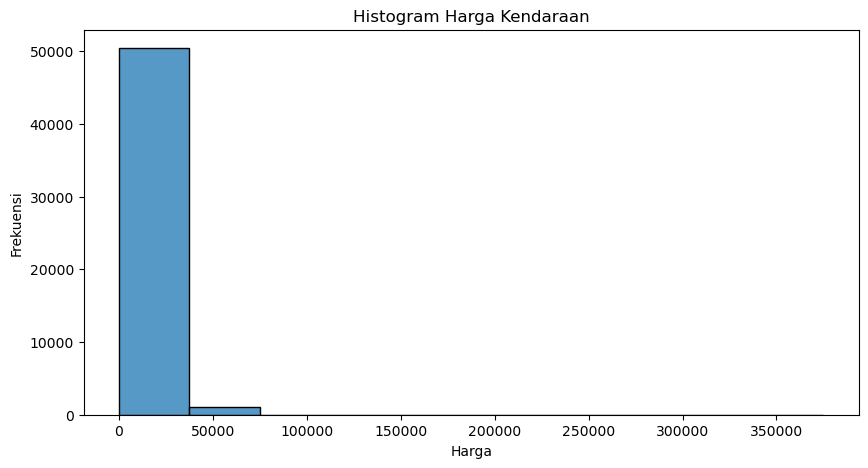

In [72]:
# Menggunakan Seaborn untuk histogram kolom price
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=10)
plt.title('Histogram Harga Kendaraan')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

--------------------------

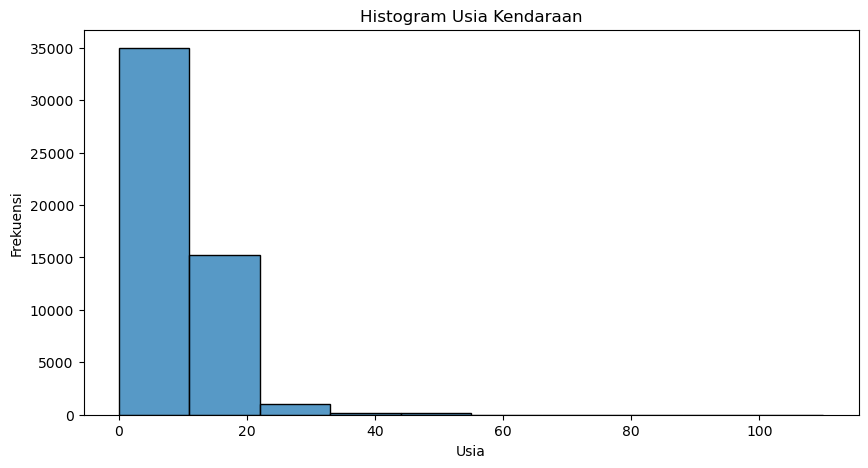

In [73]:
# Menggunakan Seaborn untuk histogram kolom vehicle_age
plt.figure(figsize=(8,4))
sns.histplot(df['vehicle_age'], bins=10)
plt.title('Histogram Usia Kendaraan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


-------------------------

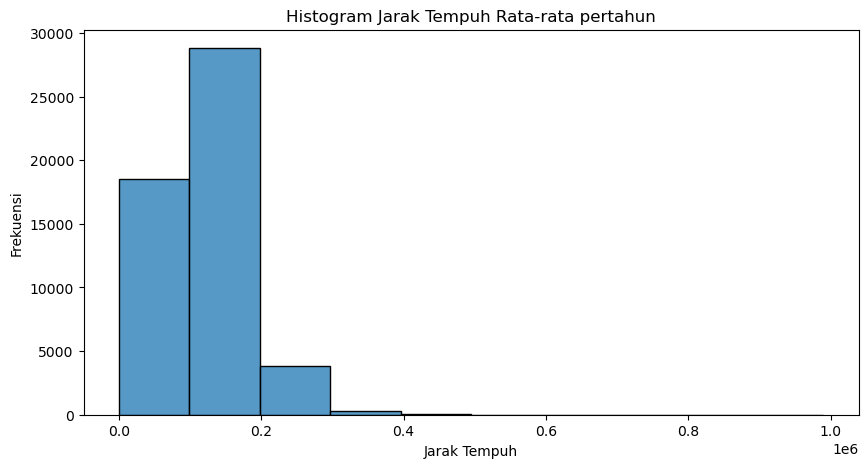

In [92]:
# Menggunakan Seaborn untuk histogram odometer
plt.figure(figsize=(8,4))
sns.histplot(df['odometer'], bins=10)
plt.title('Histogram Jarak Tempuh Rata-rata pertahun')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Frekuensi')
plt.show()

-----------------------

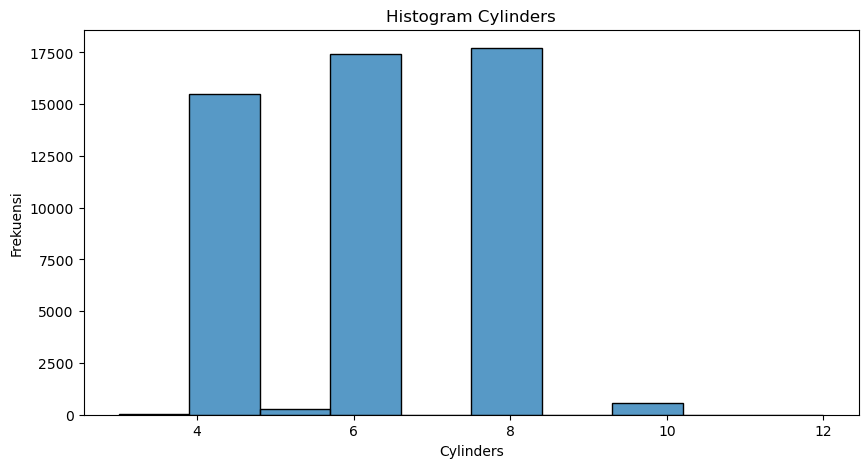

In [83]:
plt.figure(figsize=(8,4))
sns.histplot(df['cylinders'], bins=10)
plt.title('Histogram Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Frekuensi')
plt.show()


---------------------------------

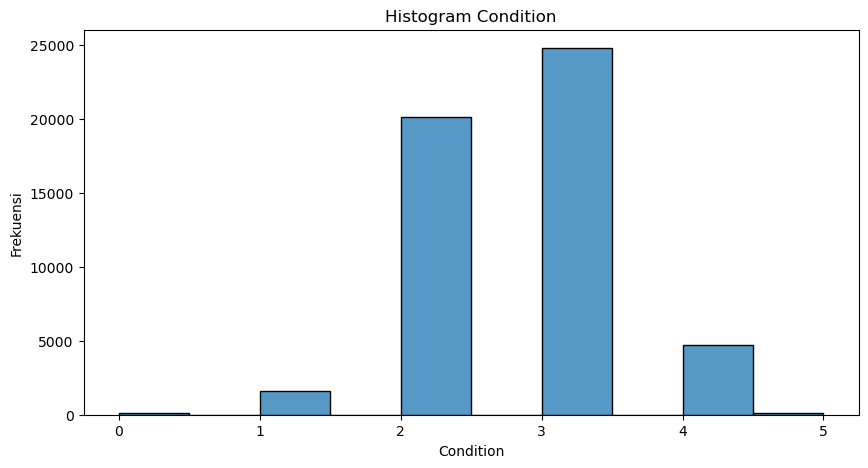

In [84]:
plt.figure(figsize=(8,4))
sns.histplot(df['condition'], bins=10)
plt.title('Histogram Condition')
plt.xlabel('Condition')
plt.ylabel('Frekuensi')
plt.show()

Kita tidak dapat melihat persebaran data secara mendetail pada kolom Harga, Usia, dan Jarak tempuh dikarenakan kolom ini mengandung outlier yang membuat banyak data terkumpul menjadi di 1 sisi saja.

## Mempelajari dan Menangani Outlier
Berdasarkan hasil sebelumnya, kita akan tentukan kolom apa yang mungkin berisi outliers dan membuat sebuah DataFrame tanpa outliers tersebut. Outliers bisa diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal,

- Mari kita tentukan outliers pada kolom yang kita tentukan kita akan memilih



In [85]:
def calculate_outlier_bounds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    return lower_whisker, upper_whisker




----------------------------

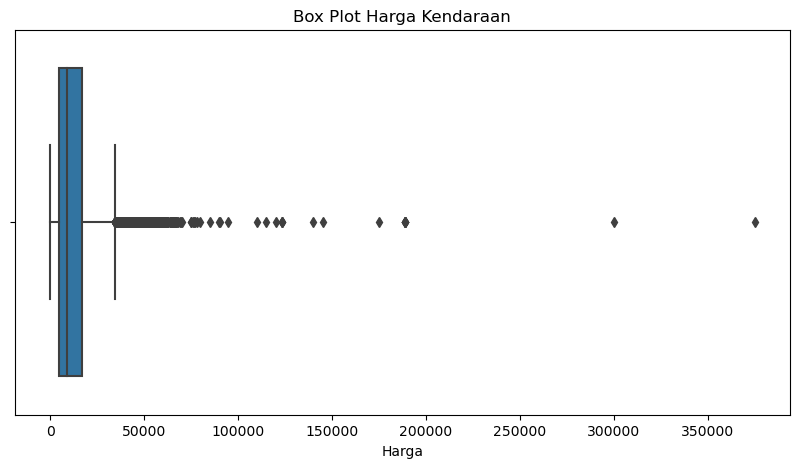

Lower Whisker, Upper Whisker

-12758.5       34597.5


In [86]:
# Tentukan batas atas outlier & Tentukan batas bawah outlier pada kolom price
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title('Box Plot Harga Kendaraan')
plt.xlabel('Harga')
plt.show()

lower_price, upper_price = calculate_outlier_bounds(df, 'price')
print("Lower Whisker, Upper Whisker")
print()
print(lower_price,"     ", upper_price)

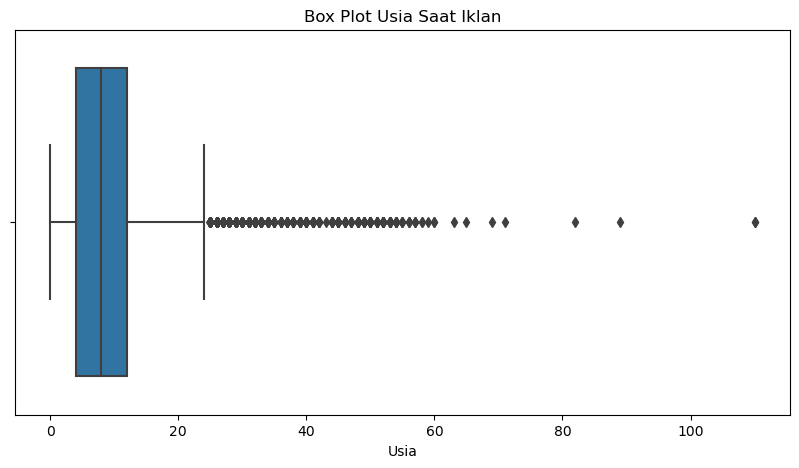

Lower Whisker, Upper Whisker

-8.0           24.0


In [89]:
# Tentukan batas atas outlier & Tentukan batas bawah outlier pada kolom price
plt.figure(figsize=(8,4))
sns.boxplot(x=df['vehicle_age'])
plt.title('Box Plot Usia Saat Iklan')
plt.xlabel('Usia')
plt.show()

lower_vehicle_age, upper_vehicle_age = calculate_outlier_bounds(df, 'vehicle_age')
print("Lower Whisker, Upper Whisker")
print()
print(lower_vehicle_age,"         ", upper_vehicle_age)

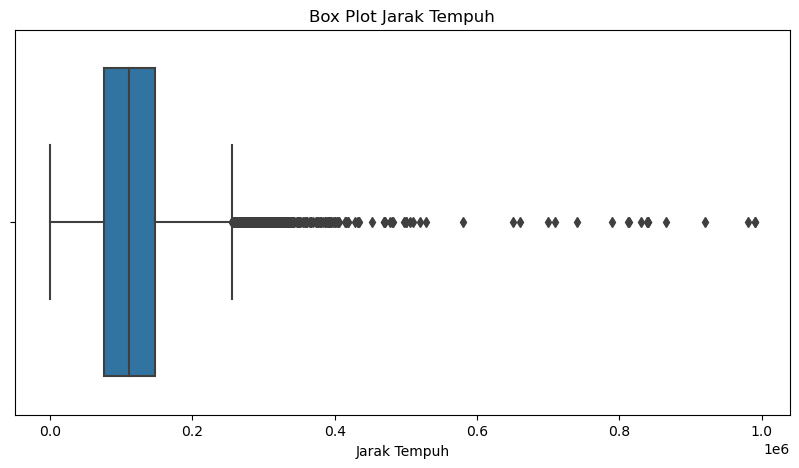

Lower Whisker, Upper Whisker

-32561.5       256050.5


In [91]:
# Tentukan batas atas outlier & Tentukan batas bawah outlier pada kolom odometer
plt.figure(figsize=(8,4))
sns.boxplot(x=df['odometer'])
plt.title('Box Plot Jarak Tempuh')
plt.xlabel('Jarak Tempuh')
plt.show()

lower_odometer, upper_odometer = calculate_outlier_bounds(df, 'odometer')
print("Lower Whisker, Upper Whisker")
print()
print(lower_odometer,"     ", upper_odometer)

Bisa dilihat di 3 diagram tersebut terdapat outlier yang membuat saat dilakukan histogram datanya bertumpuk di sebelah kiri

## Mempelajari Parameter Inti Tanpa Outlier
Saya akan memisah data tanpa outlier dan juga data yang memiliki outlier untuk melihat perbandingan persebaran data yang terdapat pada ke dua dataframe yang berbeda. Di sini saya akan membuat dataframe baru yaitu data_without_outliers

In [99]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
outlier_filter_price = (df['price'] >= lower_price) & (df['price'] <= upper_price)
outlier_filter_vehicle_age = (df['vehicle_age'] >= lower_vehicle_age) & (df['vehicle_age'] <= upper_vehicle_age)
outlier_filter_odometer = (df['odometer'] >= lower_odometer) & (df['odometer'] <= upper_odometer)



combined_outlier_filter = outlier_filter_price & outlier_filter_vehicle_age & outlier_filter_odometer

data_without_outliers = df[combined_outlier_filter]
data_without_outliers.head()
#data_without_outliers.to_csv('data_without_outliers.csv', index=False)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,avg_odometer_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,7,20714.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,12672.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,18333.0
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,other,False,2019-03-22,9,16,11351.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,40452.0


In [96]:
# cek perbandingan rentang
df.shape

(51525, 15)

In [95]:
# cek perbandingan rentang
data_without_outliers.shape

(48288, 15)

In [98]:
len(data_without_outliers) / len(df) * 100

93.71761280931587

setelah dibersihkan dari outlier, data yang berhasil dipertahankan dari dataframe asli adalah sebesar 93%

### Mari kita gunakan data yang sudah difilter untuk membuat grafik baru. Lalu bandingkan dengan data sebelumnya (yang berisi outlier). Setelah itu tentukan kesimpulannya.

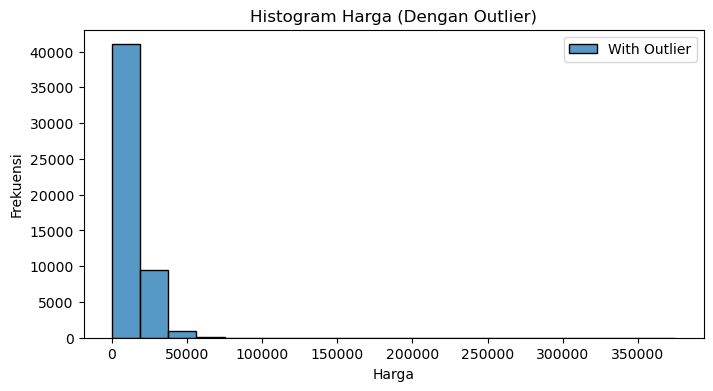

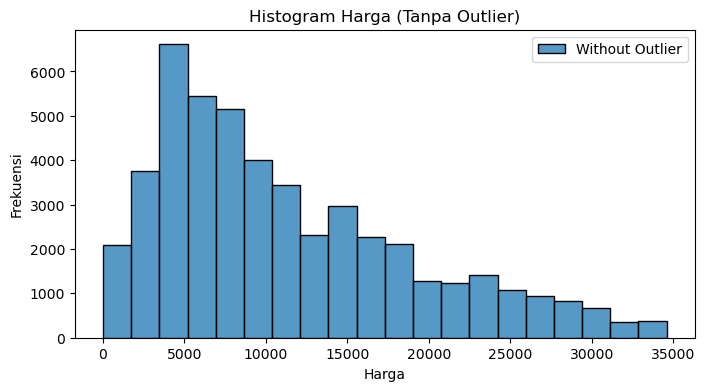

In [107]:
# Membuat histogram dengan outlier pada kolom price
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=20, label='With Outlier')
plt.title('Histogram Harga (Dengan Outlier)')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Membuat histogram tanpa outlier pada kolom price
plt.figure(figsize=(8,4))
sns.histplot(data_without_outliers['price'], bins=20, label='Without Outlier')
plt.title('Histogram Harga (Tanpa Outlier)')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

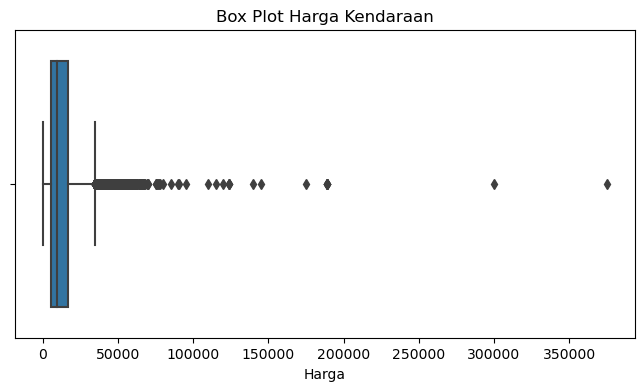

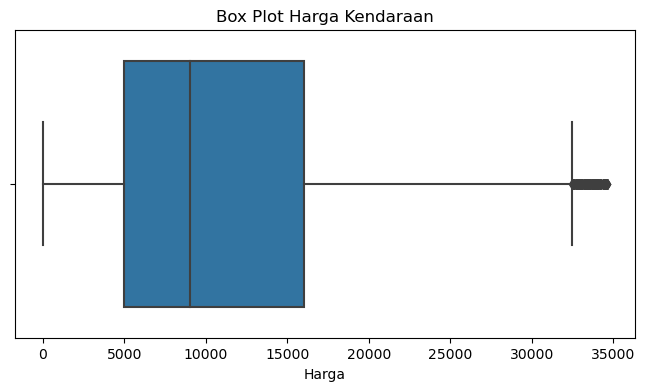

In [108]:
# Membuat boxplot dengan outlier pada kolom price
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title('Box Plot Harga Kendaraan')
plt.xlabel('Harga')
plt.show()

# Membuat boxplot tanpa outlier pada kolom price
plt.figure(figsize=(8,4))
sns.boxplot(x=data_without_outliers['price'])
plt.title('Box Plot Harga Kendaraan')
plt.xlabel('Harga')
plt.show()

------------------

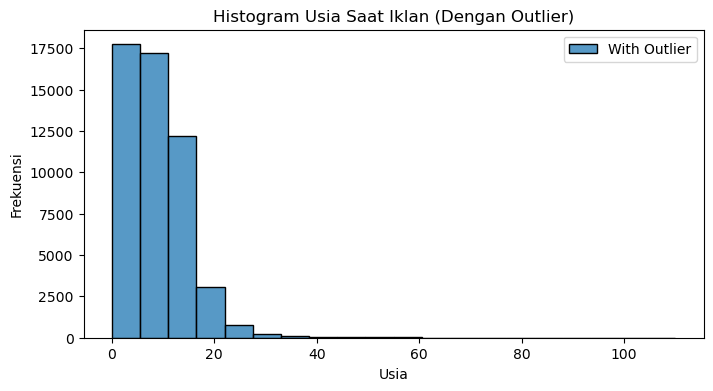

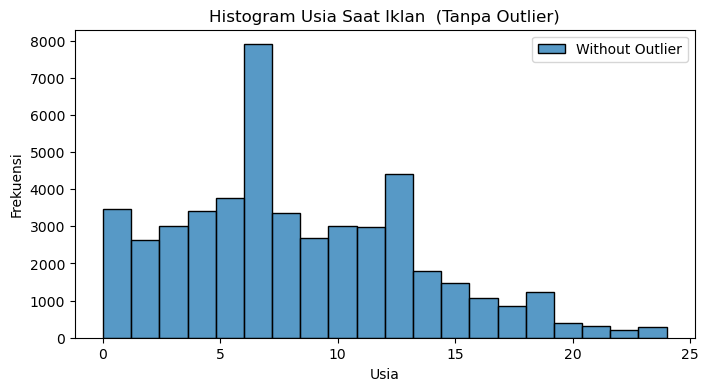

In [109]:
# Membuat histogram dengan outlier pada kolom vehicle_age
plt.figure(figsize=(8,4))
sns.histplot(df['vehicle_age'], bins=20, label='With Outlier')
plt.title('Histogram Usia Saat Iklan (Dengan Outlier)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Membuat histogram tanpa outlier pada kolom vehicle_age
plt.figure(figsize=(8,4))
sns.histplot(data_without_outliers['vehicle_age'], bins=20, label='Without Outlier')
plt.title('Histogram Usia Saat Iklan  (Tanpa Outlier)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

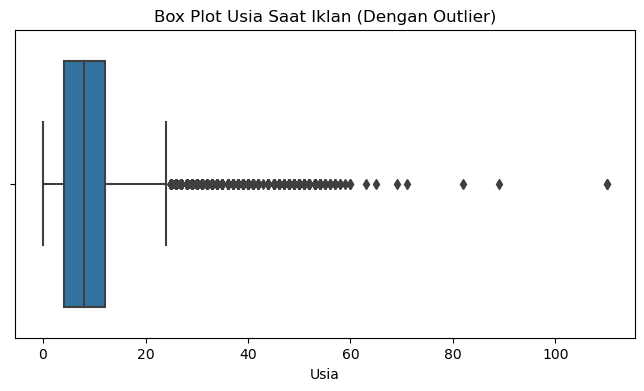

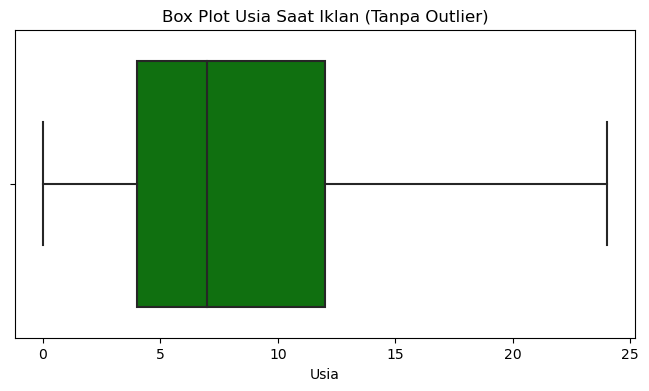

In [110]:
# Membuat boxplot dengan outlier pada kolom vehicle_age
plt.figure(figsize=(8,4))
sns.boxplot(x=df['vehicle_age'])
plt.title('Box Plot Usia Saat Iklan (Dengan Outlier)')
plt.xlabel('Usia')
plt.show()

# Membuat boxplot tanpa outlier pada kolom vehicle_age
plt.figure(figsize=(8,4))
sns.boxplot(x=data_without_outliers['vehicle_age'], color='green')
plt.title('Box Plot Usia Saat Iklan (Tanpa Outlier)')
plt.xlabel('Usia')
plt.show()

------------------------

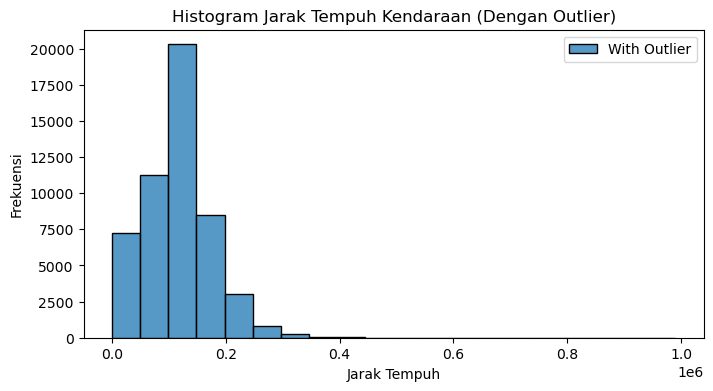

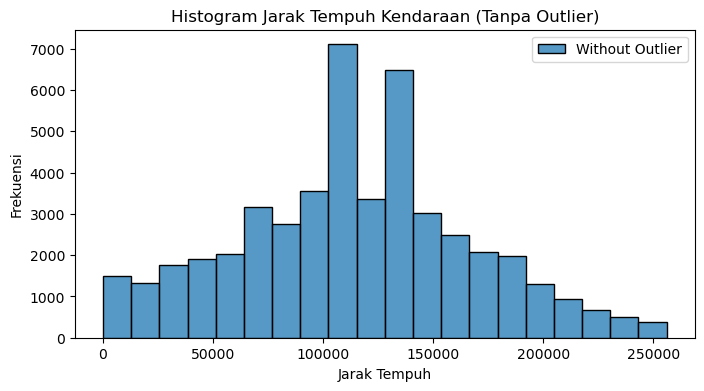

In [111]:
# Membuat histogram dengan outlier pada kolom odometer
plt.figure(figsize=(8,4))
sns.histplot(df['odometer'], bins=20, label='With Outlier')
plt.title('Histogram Jarak Tempuh Kendaraan (Dengan Outlier)')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Membuat histogram tanpa outlier pada kolom odometer
plt.figure(figsize=(8,4))
sns.histplot(data_without_outliers['odometer'], bins=20, label='Without Outlier')
plt.title('Histogram Jarak Tempuh Kendaraan (Tanpa Outlier)')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

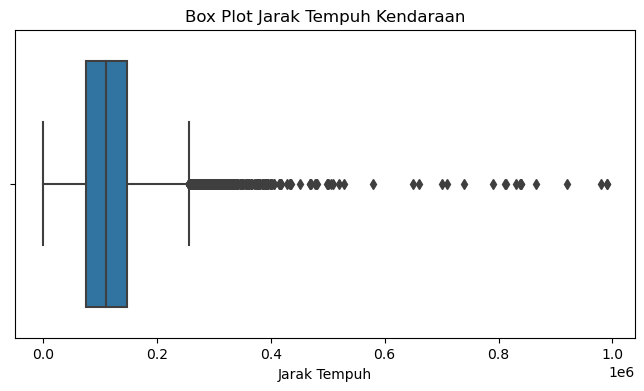

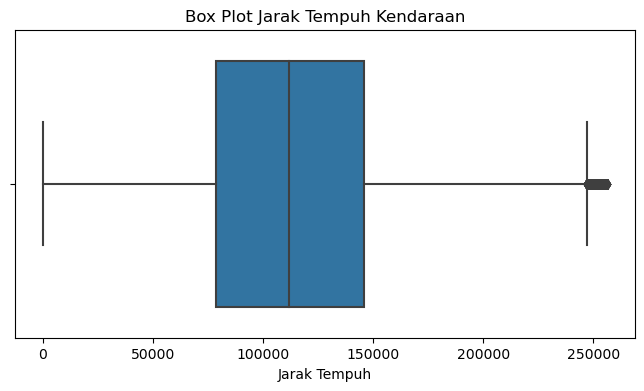

In [113]:
# Membuat boxplot dengan outlier pada kolom odometer
plt.figure(figsize=(8,4))
sns.boxplot(x=df['odometer'])
plt.title('Box Plot Jarak Tempuh Kendaraan')
plt.xlabel('Jarak Tempuh')
plt.show()

# Membuat boxplot tanpa outlier pada kolom odometer
plt.figure(figsize=(8,4))
sns.boxplot(x=data_without_outliers['odometer'])
plt.title('Box Plot Jarak Tempuh Kendaraan')
plt.xlabel('Jarak Tempuh')
plt.show()

Setelah dihapus outlier dari data, terlihat grafik lebih mudah dibaca dan lebih detail memvisualisasikan data.

## Masa Berlaku Iklan 
Kita akan mempelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya serta menjelaskan berapa lama umumnya sebuah iklan ditayangkan. Setelah itu, tentukan kapan iklan dihapus dengan cepat dan kapan iklan ditayangkan dalam waktu yang sangat lama.




In [132]:
# Rata-rata hari iklan ditayangkan & Median hari iklan ditayangkan
mean_days_listed = df['days_listed'].mean()
median_days_listed = df['days_listed'].median()

print("Rata-rata hari iklan ditayangkan:", mean_days_listed)
print("Median hari iklan ditayangkan:", median_days_listed)


Rata-rata hari iklan ditayangkan: 39.55475982532751
Median hari iklan ditayangkan: 33.0


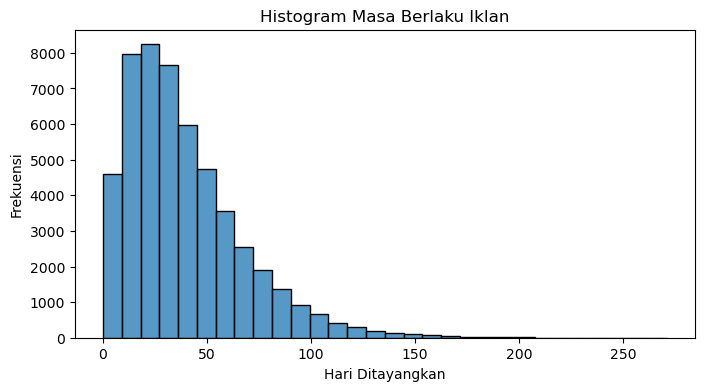

In [114]:
# mari kita lihat distribusi histogram days_listed
plt.figure(figsize=(8,4))
sns.histplot(df['days_listed'], bins=30)
plt.title('Histogram Masa Berlaku Iklan')
plt.xlabel('Hari Ditayangkan')
plt.ylabel('Frekuensi')
plt.show()

Rata-rata hari iklan ditayangkan adalah 39 hari. Selain itu, Suatu iklan ternyata cukup lama di angka sekitar kurang lebih 20 hari ditayangkan atau angka ini bisa dibilang cukup terpusat untuk ditayangkan pada hari tersebut. Seterusnya, semakin menurun di hari penayangan berikutnya. Hal ini memungkinkan demand pada angka terpusat memiliki demand yang sangat tinggi.

## Harga Rata-Rata Setiap Jenis Kendaraan

- Di sini kita akan melakukan analisis pada jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buat sebuah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Lalu, pilih jenis kendaraan dengan jumlah iklan yang paling banyak.

In [115]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,avg_odometer_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,7,20714.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,12672.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,18333.0
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,other,False,2019-03-22,9,16,11351.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,40452.0


In [119]:
ads_per_type = df['type'].value_counts().reset_index()
ads_per_type.columns = ['type', 'ads_count']

top_types = ads_per_type.nlargest(2, 'ads_count')['type']

filtered_data = df[df['type'].isin(top_types)]

In [121]:
pivot_table = filtered_data.pivot_table(index='type', values='price', aggfunc='mean').reset_index()
pivot_table

,type,price
0,SUV,11149.400000
1,truck,16734.894924


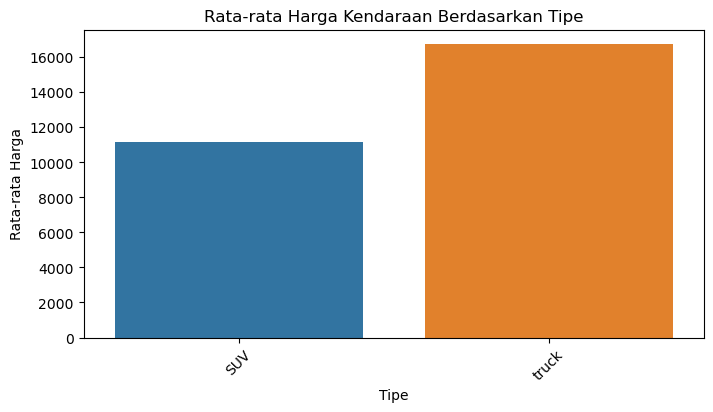

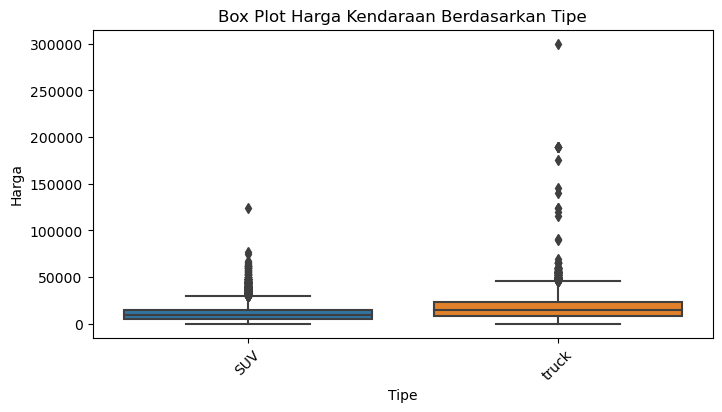

In [123]:
# Visualisasi dengan barplot untuk rata-rata (mean) masa berlaku iklan
plt.figure(figsize=(8,4))
sns.barplot(data=pivot_table, x='type', y= 'price')
plt.title('Rata-rata Harga Kendaraan Berdasarkan Tipe')
plt.xlabel('Tipe')
plt.ylabel('Rata-rata Harga')
plt.xticks(rotation=45)
plt.show()

# Visualisasi dengan barplot untuk total (sum) masa berlaku iklan
plt.figure(figsize=(8,4))
sns.boxplot(data=filtered_data, x='type', y='price')
plt.title('Box Plot Harga Kendaraan Berdasarkan Tipe')
plt.xlabel('Tipe')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.show()

**Kesimpulan Sementara**

Bisa kita lihat bahwa kendaraan dengan tipe truck memiliki harga yang dominan lebih tinggi dibandingkan SUV. Mungkin ini disebabkan oleh kemampuan dari kendaraan itu sendiri yang mana truck lebih bisa memuat banyak barang bawaan dibandingkan SUV

## Faktor Harga

Pada tahap ini kita akan mempelajari apakah faktor yang paling memengaruhi harga kendaraan? Di sini kita akan ambil masing-masing jenis kendaraan populer yang kita temukan pada tahap sebelumnya dan mempelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Kita akan membuat grafik boxplot untuk variabel kategorik (jenis transmisi dan warna), lalu membuat scatterplot untuk sisanya. Saat menganalisis variabel kategorik, kita harus mengerti bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

- Sebelumnya di atas kita melakukan penentuan dengan 2 tipe mobil populer. Mari kita lihat dengan menggunakan nilai yang cukup kita wakilkan yaitu 3 nilai yang akan kita preview untuk ke kolom type antara lain: SUV, sedan, dan truck.
- Setelah itu, mari kita manfaatkan matriks korelasi dan plot korelasi


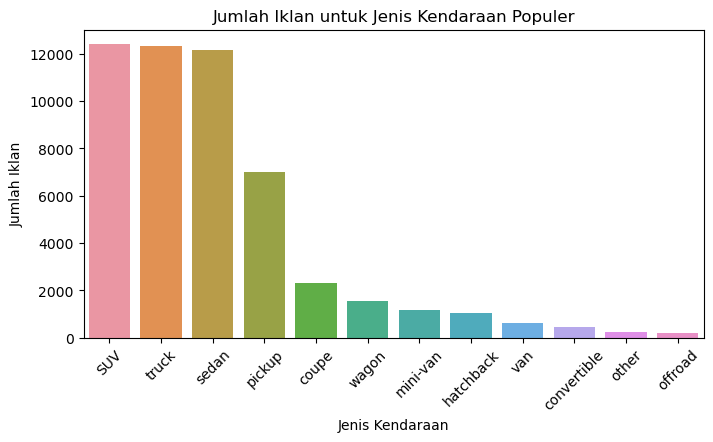

In [124]:
# Menghitung jumlah iklan untuk setiap jenis kendaraan
vehicle_type_counts = df['type'].value_counts()

# Memilih jenis kendaraan yang memiliki setidaknya 50 iklan
popular_vehicle_types = vehicle_type_counts[vehicle_type_counts >= 50].index

# Membuat barplot untuk jenis kendaraan populer
plt.figure(figsize=(8,4))
sns.barplot(x=popular_vehicle_types, y=vehicle_type_counts[popular_vehicle_types])
plt.title('Jumlah Iklan untuk Jenis Kendaraan Populer')
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Jumlah Iklan')
plt.xticks(rotation=45)
plt.show()

Pertama kita akan filter data kendaraan yang populer dengan menggunakan kondisi di mana iklan lebih besar atau sama dengan 50 kali tampil. Terlihat SUV, truck, dan sedan memiliki tingkat popularitas yang tinggi, frekuensi nilai yang dimiliki tidak jauh berbeda. Untuk analisa lebih lanjut, kita akan memilih 3 data tertinggi saja untuk dijadikan sampel.

Analisis untuk Jenis Kendaraan: SUV


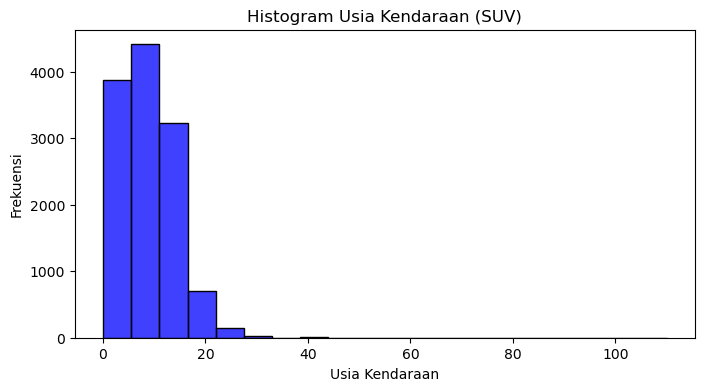

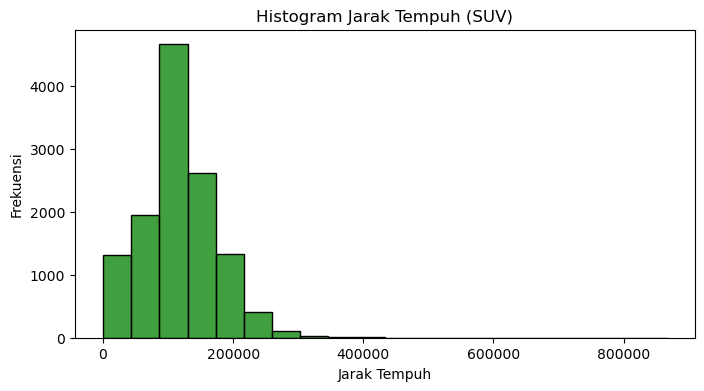

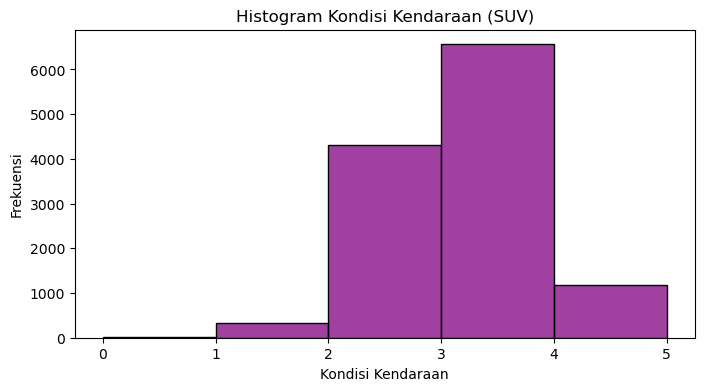



Analisis untuk Jenis Kendaraan: truck


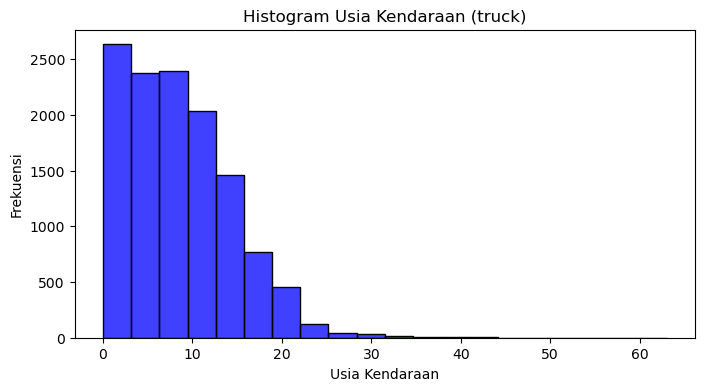

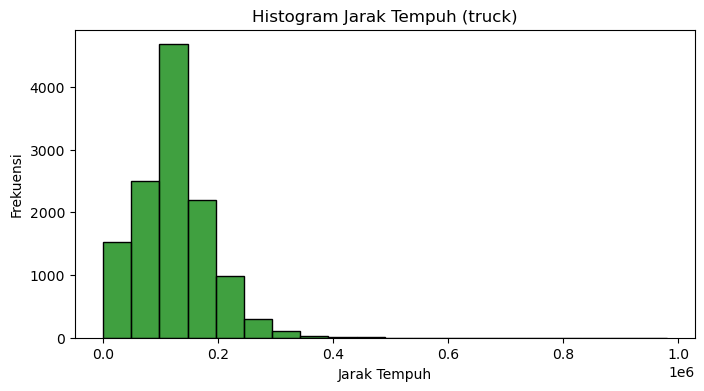

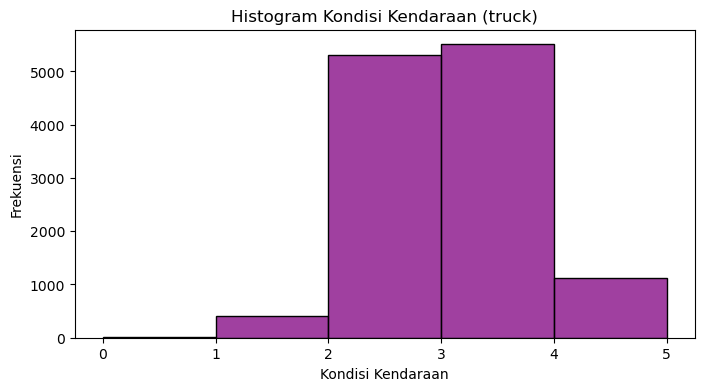



Analisis untuk Jenis Kendaraan: sedan


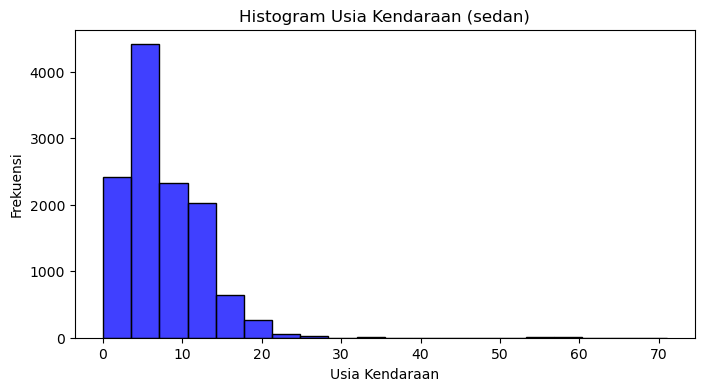

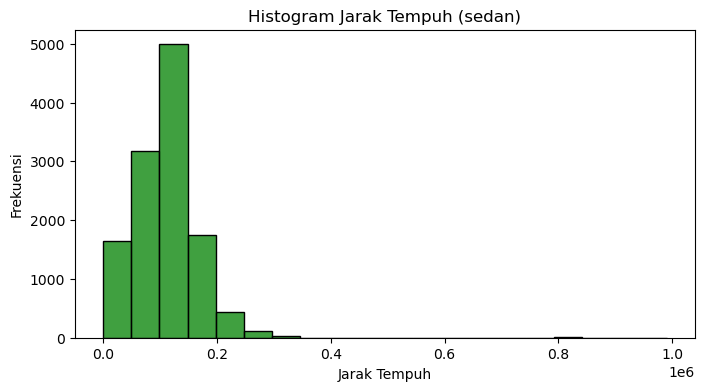

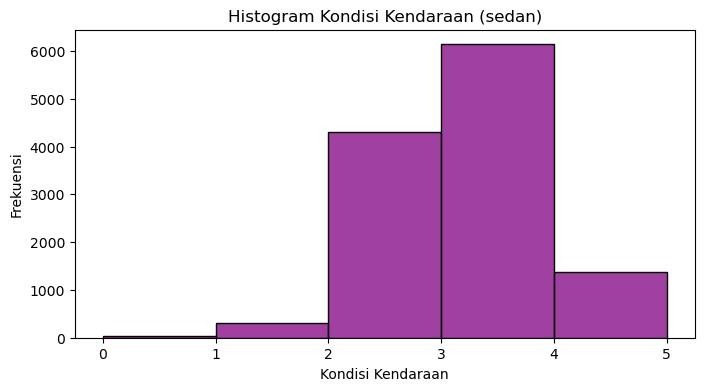

In [125]:
vehicle_type_counts = df['type'].value_counts()

# Memilih jenis kendaraan populer: SUV, truck, sedan
popular_vehicle_types = ['SUV', 'truck', 'sedan']

# Looping untuk masing-masing jenis kendaraan populer
for vehicle_type in popular_vehicle_types:
    print(f"Analisis untuk Jenis Kendaraan: {vehicle_type}")
    
    # Mengambil data untuk jenis kendaraan tertentu
    vehicle_data = df[df['type'] == vehicle_type]
    
    # Analisis usia kendaraan dengan histogram
    plt.figure(figsize=(8,4))
    sns.histplot(data=vehicle_data, x='vehicle_age', bins=20, kde=False, color='blue')
    plt.title(f'Histogram Usia Kendaraan ({vehicle_type})')
    plt.xlabel('Usia Kendaraan')
    plt.ylabel('Frekuensi')
    plt.show()
    
    # Analisis jarak tempuh dengan histogram
    plt.figure(figsize=(8,4))
    sns.histplot(data=vehicle_data, x='odometer', bins=20, kde=False, color='green')
    plt.title(f'Histogram Jarak Tempuh ({vehicle_type})')
    plt.xlabel('Jarak Tempuh')
    plt.ylabel('Frekuensi')
    plt.show()
    
    # Analisis kondisi kendaraan dengan histogram
    plt.figure(figsize=(8,4))
    sns.histplot(data=vehicle_data, x='condition', bins=5, kde=False, color='purple')
    plt.title(f'Histogram Kondisi Kendaraan ({vehicle_type})')
    plt.xlabel('Kondisi Kendaraan')
    plt.ylabel('Frekuensi')
    plt.show()
    
    print("\n")

**Kesimpulan Sementara**

Dari semua data visual, ini merupakan distribusi untuk perwakilan setiap chart yang kita tampilkan. Menampilkan 3 kolom yang tinggi tersebut sudah cukup mewakili untuk analisa faktor yang berpengaruh antar keterkaitan kolom. Karena frekuensi yang tinggi pasti merupakan suatu kebiasaan pelanggan yang diciptakan pada suatu proses bisnis yang terjadi. Untuk analisa selanjutnya kita akan melakukan method .corr() untuk melihat seberapa kuat data tersebut saling bergantung.

<Axes: >

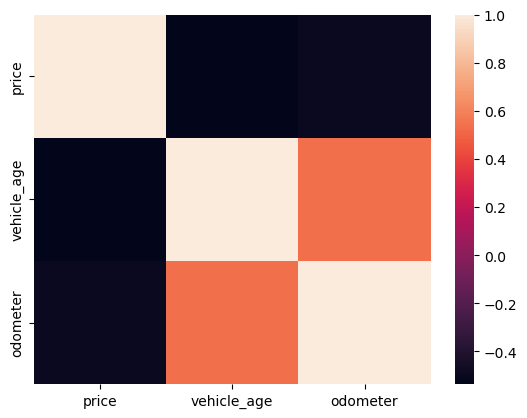

In [126]:
# Mengambil data untuk jenis kendaraan SUV
suv_data = df[df['type'] == 'SUV']

# Membuat matriks korelasi
correlation_matrix_suv = suv_data[['price', 'vehicle_age', 'odometer']].corr()

sns.heatmap(correlation_matrix_suv)

**Korelasi SUV:**
- Usia kendaraan (vehicle_age) memiliki hubungan negatif yang kuat dengan harga (price). Semakin tua kendaraan, harga cenderung lebih rendah.
- Jarak tempuh (odometer) memiliki hubungan negatif yang cukup kuat dengan harga (price). Semakin tinggi jarak tempuh, harga kendaraan cenderung lebih rendah.
- Usia kendaraan (vehicle_age) memiliki hubungan positif yang kuat dengan jarak tempuh (odometer). Semakin tua kendaraan, jarak tempuhnya cenderung lebih tinggi.

<Axes: >

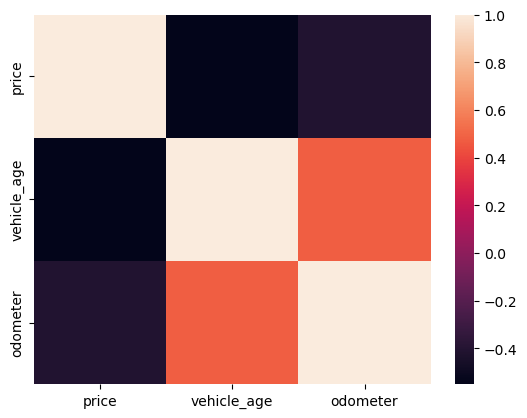

In [127]:
# Mengambil data untuk jenis kendaraan truck
truck_data = df[df['type'] == 'truck']

# Membuat matriks korelasi
correlation_matrix_truck = truck_data[['price', 'vehicle_age', 'odometer']].corr()

sns.heatmap(correlation_matrix_truck)

**Korelasi Truck:**
- Usia kendaraan (vehicle_age) memiliki hubungan negatif yang kuat dengan harga (price). Semakin tua kendaraan, harga cenderung lebih rendah.
- Jarak tempuh (odometer) memiliki hubungan negatif yang cukup kuat dengan harga (price), meskipun lebih lemah dibandingkan dengan hubungan usia kendaraan.
- Usia kendaraan (vehicle_age) memiliki hubungan positif yang kuat dengan jarak tempuh (odometer). Semakin tua kendaraan, jarak tempuhnya cenderung lebih tinggi.

<Axes: >

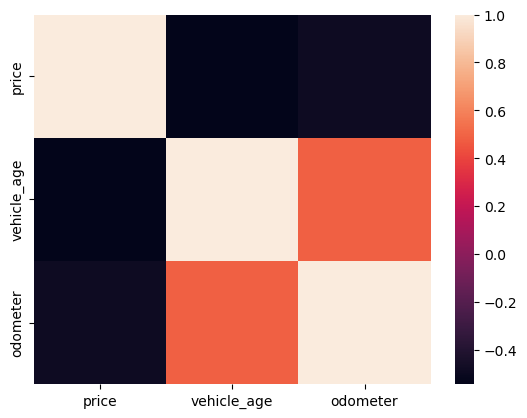

In [128]:
# Mengambil data untuk jenis kendaraan sedan
sedan_data = df[df['type'] == 'sedan']

# Membuat matriks korelasi
correlation_matrix_sedan = sedan_data[['price', 'vehicle_age', 'odometer']].corr()

sns.heatmap(correlation_matrix_sedan)

**Korelasi Sedan:**

- Harga (price) memiliki hubungan negatif yang kuat dengan usia kendaraan (vehicle_age). Semakin tua kendaraan, harga cenderung lebih rendah.
- Harga (price) memiliki hubungan negatif yang cukup kuat dengan jarak tempuh (odometer). Semakin tinggi jarak tempuh kendaraan, harga cenderung lebih rendah.
- Usia kendaraan (vehicle_age) memiliki hubungan positif yang cukup kuat dengan jarak tempuh (odometer). Semakin tua kendaraan, jarak tempuhnya cenderung lebih tinggi.

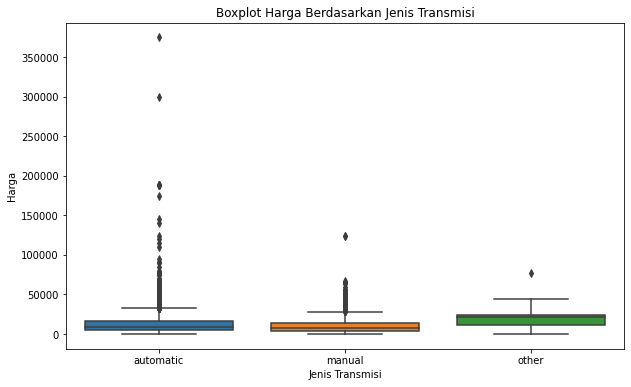

In [142]:
# boxplot untuk jenis transmisi
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Boxplot Harga Berdasarkan Jenis Transmisi')
plt.xlabel('Jenis Transmisi')
plt.ylabel('Harga')
plt.show()

Mobil yang diiklankan banyak yang bertipe otomatis, mengingat tipe transmisi ini yang paling mudah dioperasikan

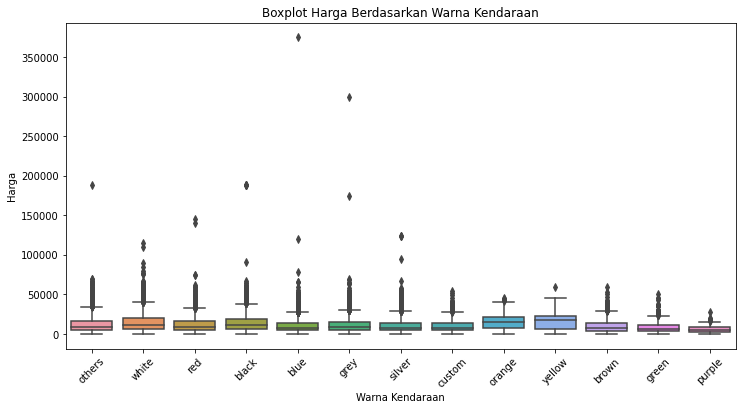

In [143]:
# boxplot untuk warna
plt.figure(figsize=(12, 6))
sns.boxplot(x='paint_color', y='price', data=df)
plt.title('Boxplot Harga Berdasarkan Warna Kendaraan')
plt.xlabel('Warna Kendaraan')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.show()


Walaupun sangat terlihat sekali data nya memiliki outlier, tapi dapat kita simpulkan bahwa mayoritas mobil berwarna biru. Akan tetapi ada 1 mobil yang memiliki nilai jual sangat tinggi di warna biru, mungkin ini adalah warna spesial dari varian mobil itu?

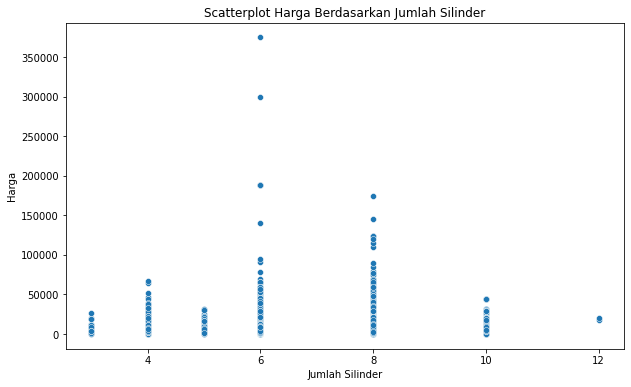

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cylinders', y='price', data=df)
plt.title('Scatterplot Harga Berdasarkan Jumlah Silinder')
plt.xlabel('Jumlah Silinder')
plt.ylabel('Harga')
plt.show()

Dapat kita lihat bahwa kebanyakan mobil yang dijual mempunyai 6/8 silinder, ini sesuai dengan data yang kita punya bahwa kebanyakan yang diiklan kan adalah mobil bertipe SUV dan truck. sedangkan untuk city car biasanya memiliki 3-4 silinder saja.

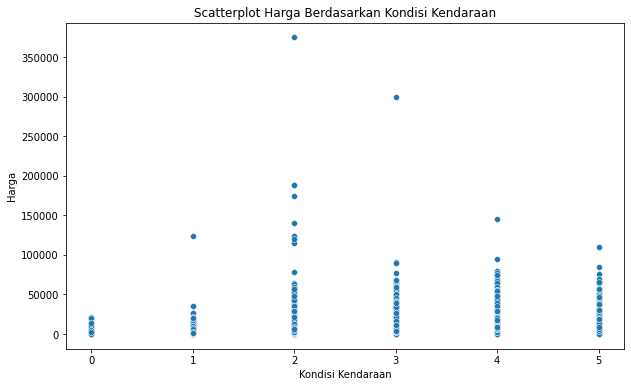

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='condition', y='price', data=df)
plt.title('Scatterplot Harga Berdasarkan Kondisi Kendaraan')
plt.xlabel('Kondisi Kendaraan')
plt.ylabel('Harga')
plt.show()

Perlu diingat kembali sebelumnya kita telah mengganti nilai pada condition dengan menggunakan skala numerik

- new = 5,
- like new = 4,
- excellent = 3,
- good = 2,
- fair = 1,
- salvage = 0

Kebanyakan mobil yang dijual berada pada kondisi good - new

## Kesimpulan

Dalam proyek ini, kami telah melakukan analisis data terhadap ratusan iklan kendaraan di Crankshaft List untuk menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan. Proses analisis dimulai dengan pra-pemrosesan data, di mana kami memuat data, menganalisis data awal, dan merumuskan langkah-langkah selanjutnya.

Kami mengatasi nilai-nilai yang hilang dengan berbagai pendekatan, seperti menghapus baris yang memiliki nilai hilang atau mengisi nilai kosong dengan nilai yang sesuai seperti median atau nilai acak. Kami juga melakukan pemeriksaan tipe data dan memperbaiki tipe data yang tidak sesuai.

Selanjutnya, kami membersihkan data dari duplikat dan menangani outlier pada beberapa parameter utama seperti harga, usia kendaraan, dan jarak tempuh. Kami melakukan analisis terhadap parameter-parameter ini dengan menggunakan visualisasi histogram, boxplot, dan scatter plot. Dalam beberapa kasus, kami juga menggunakan pivot table untuk menganalisis hubungan antara parameter-parameter tertentu.

Kami menemukan bahwa usia kendaraan dan jarak tempuh memiliki korelasi negatif yang signifikan terhadap harga, artinya semakin tua kendaraan atau semakin tinggi jarak tempuhnya, cenderung harga kendaraan lebih rendah. Kami juga melihat bahwa jenis kendaraan seperti SUV, truck, dan sedan memiliki pola korelasi serupa terhadap harga.

